In [1]:
import torch
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
MODEL_TYPE = "vit_h"

In [2]:
DEVICE = 'cpu'

In [3]:
MODEL_TYPE = "vit_h"
CHECKPOINT_PATH = "/home/local/KHQ/s.erattakulangara/Documents/HistomicsTK_EKS/dsa-run-custom-ai-models/debug/weights/sam_vit_h_4b8939.pth"

In [4]:
#install all the pip dependencies
#!pip install git+https://github.com/facebookresearch/segment-anything.git

In [5]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH).to(device=DEVICE)

In [97]:
import cv2

image = cv2.imread("/home/local/KHQ/s.erattakulangara/Downloads/ome-region-2.png")
print(image.shape)

(837, 828, 3)


In [98]:
type(image)

numpy.ndarray

In [99]:
# run sam on the given image
mask_generator = SamAutomaticMaskGenerator(sam)
sam_result = mask_generator.generate(image)

In [100]:
print(sam_result)

[{'segmentation': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), 'area': 6540, 'bbox': [55, 0, 91, 93], 'predicted_iou': 1.0310865640640259, 'point_coords': [[116.4375, 13.078125]], 'stability_score': 0.9785141348838806, 'crop_box': [0, 0, 828, 837]}, {'segmentation': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), 'area': 74493, 'bbox': [163, 219, 302, 316], 'predicted_iou': 1.01542508602142

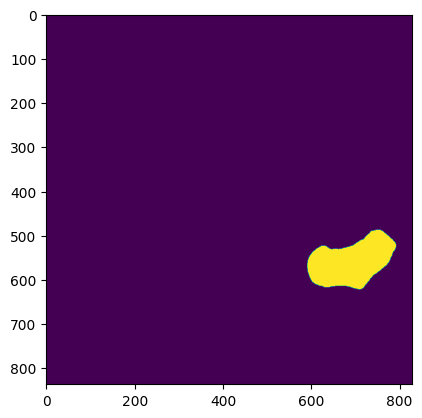

In [102]:
import matplotlib.pyplot as plt
plt.imshow(sam_result[3]['segmentation'])

In [103]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming sam_result is a list of segmentation results
segmentations = [result['segmentation'] for result in sam_result]

74493


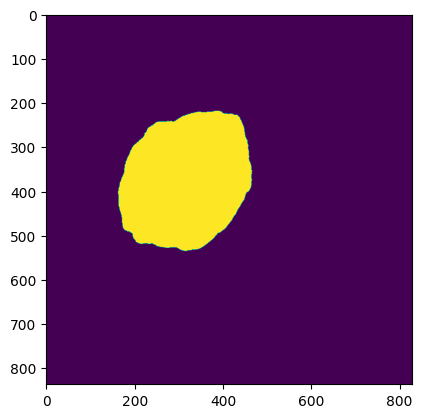

In [183]:
plt.imshow(segmentations[1])
print(np.count_nonzero(segmentations[1]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


40


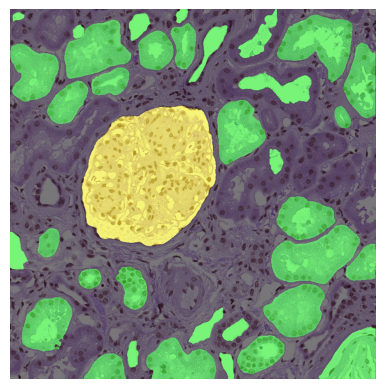

In [195]:
from matplotlib.colors import ListedColormap
# Overlay the segmentation mask on the image
overlay = np.zeros_like(image, dtype=np.float32)

# Overlay each segmentation with a unique color
for i, segmentation in enumerate(segmentations):

    if np.count_nonzero(segmentation) < 100:
        overlay[segmentation > 0] = [0,256,0]
    elif i == 1:
        overlay[segmentation > 0] = [255,255,0]

    elif i != 0:
        overlay[segmentation > 0] = [0,128,0]
    

    if i == 40:
        break
print(i)
plt.axis('off')
plt.imshow(image)
plt.imshow(overlay, cmap='jet', alpha=0.5)
plt.savefig('overlay.png', dpi=300)
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


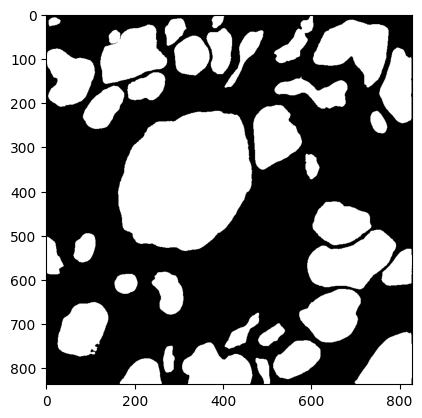

In [175]:
#plt.imshow(image)
plt.imshow(overlay, cmap='gray')
plt.show()

In [88]:
overlay.shape

(1023, 1212, 3)

In [25]:
#create the annotation for all the cropped masks
for i in range(len(sam_result)):
    contours, _ = cv2.findContours(sam_result[i]['segmentation'].astype('uint8'), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    output_list = [[[x[0][1], x[0][0], 0]
                            for x in arr.tolist()] for arr in list(contours)]
    print('output', type(output_list), output_list, contours)
    break

output <class 'list'> [[[962, 389, 0], [963, 388, 0], [963, 383, 0], [964, 382, 0], [964, 380, 0], [966, 378, 0], [966, 377, 0], [977, 366, 0], [978, 366, 0], [979, 365, 0], [980, 365, 0], [982, 363, 0], [984, 363, 0], [985, 362, 0], [987, 362, 0], [988, 361, 0], [992, 361, 0], [993, 360, 0], [999, 360, 0], [999, 412, 0], [994, 412, 0], [993, 411, 0], [984, 411, 0], [983, 410, 0], [977, 410, 0], [976, 409, 0], [974, 409, 0], [973, 408, 0], [972, 408, 0], [971, 407, 0], [970, 407, 0], [968, 405, 0], [967, 405, 0], [965, 403, 0], [965, 402, 0], [964, 401, 0], [964, 400, 0], [963, 399, 0], [963, 395, 0], [962, 394, 0]]] (array([[[389, 962]],

       [[388, 963]],

       [[383, 963]],

       [[382, 964]],

       [[380, 964]],

       [[378, 966]],

       [[377, 966]],

       [[366, 977]],

       [[366, 978]],

       [[365, 979]],

       [[365, 980]],

       [[363, 982]],

       [[363, 984]],

       [[362, 985]],

       [[362, 987]],

       [[361, 988]],

       [[361, 992]],



In [1]:
# setting device on GPU if available, else CPU
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

Using device: cpu

